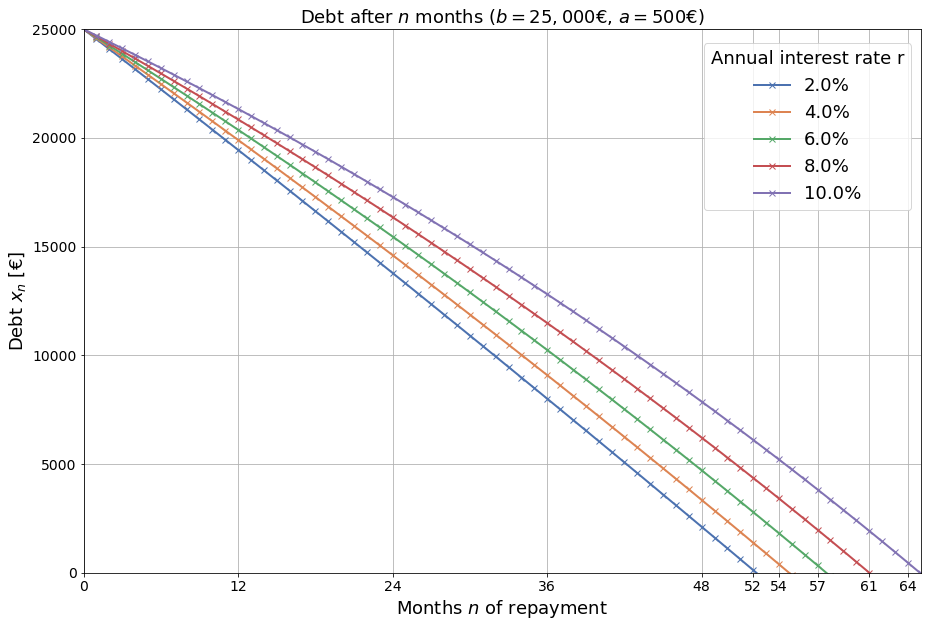

In [68]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

clrs = sns.color_palette("deep")

#def get_current_debt(debt,repay_rate,interest_rate,nmonths):
#
#   def repayment(debt,repay_rate,interest_rate):
#
#        b = debt
#        r = interest_rate
#        a = repay_rate
#
#        return debt*(1+r) - a
#
#    for month in range(nmonths):
#        debt = repayment(debt,repay_rate,interest_rate)
#
#    return debt

def get_current_debt_analytical(loan_line,monthly_repayment_rate,annual_interest_rate,month):
    
    b = loan_line
    a = monthly_repayment_rate
    r = annual_interest_rate/12
    n = month

    return b*(1+r)**n - a/r*((1+r)**n - 1)

    



# Define data
#----------------
nmonths   = 66
months_array   = np.arange(nmonths+1)
loan_line      = 25000
annual_interest_rate_array  = np.arange(0.02,0.12,0.02)
monthly_repayment_rate = 500  


# Define plot
#----------------
lw = 2
title = r"Debt after $n$ months ($b = 25,000€$, $a=500€$)"
xlabel,ylabel= r"Months $n$ of repayment", r"Debt $x_n$ [€]"
fs_label,fs_tick = 18,14 

base_size1,base_size2 = 15,10
fig,axs = plt.subplots(figsize=(base_size1,base_size2))


idx_paid_off = list()
for ii,r in enumerate(annual_interest_rate_array):
    debt_array = get_current_debt_analytical(loan_line,monthly_repayment_rate,r,months_array)
    idx = np.where(debt_array >= 0)[0][-1]
    idx_paid_off.append(months_array[idx])   

    label = f"{np.round(r*100,1)}%"
    axs.plot(months_array[:idx+2],debt_array[:idx+2],label=label,linewidth=lw,marker="x",color=clrs[ii])

axs.tick_params(labelsize=fs_tick)
axs.set_xlabel(xlabel,fontsize=fs_label)
axs.set_ylabel(ylabel,fontsize=fs_label)
axs.set_title(title,fontsize=fs_label)
axs.set_xticks(list(np.arange(0,nmonths-12,12))+idx_paid_off)
axs.set_xlim([0,loan_runtime])
axs.set_ylim([0,loan_line])
axs.legend(fontsize=fs_label,loc="lower left",bbox_to_anchor=(0.73,0.65),ncol=1,title="Annual interest rate r",title_fontsize=fs_label)
axs.grid()  

fig.savefig("../img/2024-10-06-loans/debt_after_months.png",dpi=300,transparent=True,bbox_inches="tight")

In [63]:

debt_array = get_current_debt_analytical(loan_line,monthly_repayment_rate,0.1,months_array)

Text(0, 0.5, '$(N a - b)/b$ [%]')

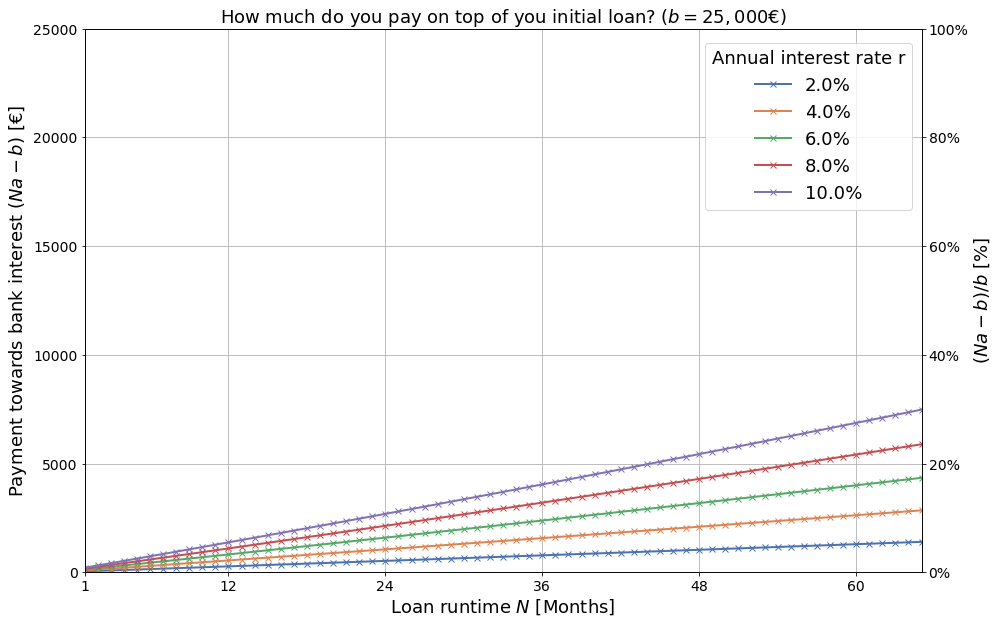

In [100]:



def get_monthly_repayment_rate(loan_line,annual_interest_rate,loan_runtime):
    
    b = loan_line
    r = annual_interest_rate/12
    N = loan_runtime

    return r*b*(1+r)**N/((1+r)**N-1)


    

# Define data
#----------------
nmonths   = 66
loan_runtime_array   = np.arange(1,nmonths+1)
loan_line      = 25000
annual_interest_rate_array  = np.arange(0.02,0.12,0.02)

# Define plot
#----------------
lw = 2
title = r"How much do you pay on top of you initial loan? ($b = 25,000€$)"
xlabel,ylabel= r"Loan runtime $N$ [Months]", r"Payment towards bank interest ($N a - b$) [€]"
ylabel2 = r"$(N a - b)/b$ [%]"
fs_label,fs_tick = 18,14 

base_size1,base_size2 = 15,10
fig,axs = plt.subplots(figsize=(base_size1,base_size2))


idx_paid_off = list()
for ii,r in enumerate(annual_interest_rate_array):
    repayment_array = get_monthly_repayment_rate(loan_line,r,loan_runtime_array)

    label = f"{np.round(r*100,1)}%"
    axs.plot(loan_runtime_array,loan_runtime_array*repayment_array-loan_line,label=label,linewidth=lw,marker="x",color=clrs[ii])

axs.tick_params(labelsize=fs_tick)
axs.set_xlabel(xlabel,fontsize=fs_label)
axs.set_ylabel(ylabel,fontsize=fs_label)
axs.set_title(title,fontsize=fs_label)
axs.set_xticks([1,]+list(np.arange(12,nmonths,12)))
axs.set_xlim([1,loan_runtime])
axs.set_ylim([0,loan_line])
axs.legend(fontsize=fs_label,loc="lower left",bbox_to_anchor=(0.73,0.65),ncol=1,title="Annual interest rate r",title_fontsize=fs_label)
axs.grid()  

axs2 = axs.twinx()
axs2.set_yticks(axs.get_yticks()/loan_line*100)
axs2.set_yticklabels(["{0:.0f}%".format(ytick) for ytick in axs2.get_yticks()])
axs2.tick_params(labelsize=fs_tick)
axs2.set_ylabel(ylabel2,fontsize=fs_label)
fig.savefig("../img/2024-10-06-loans/repayments_vs_runtime.png",dpi=300,transparent=True,bbox_inches="tight")

In [76]:

get_monthly_repayment_rate(loan_line,0.06,loan_runtime_array)

array([25125.        , 12593.82793017,  8416.80520891,  6328.31982447,
        5075.24937439,  4239.8863911 ,  3643.21338844,  3195.72162324,
        2847.68401592,  2569.26431868,  2341.47582832,  2151.66074268,
        1991.05596789,  1853.40215117,  1734.10910044,  1629.73417161,
        1537.64475446,  1455.79326324,  1382.56318285,  1316.6613012 ,
        1257.04073225,  1202.84493291,  1153.36632402,  1108.01525632,
        1066.29642436,  1027.79072354,   992.14113881,   959.04165722,
         928.22847453,   899.47296035,   872.57598497,   847.36330991,
         823.68181645,   801.39639984,   780.38739585,   760.54843629,
         741.78465218,   724.01116076,   707.15178517,   691.13796623,
         675.90783345,   661.40540874,   647.57992128,   634.38521577,
         621.77923956,   609.72359679,   598.18315927,   587.1257262 ,
         576.52172536,   566.34395033,   556.56732851,   547.16871593,
         538.12671536,   529.42151451,   521.03474199,   512.94933865,
      